<div style="font-size:18px; font-family:'Tahoma'; direction:rtl; color:Green;">
معرفی و وارد کردن کتابخانه ها
</div>


In [332]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('heart.csv')

In [333]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<div style="font-size:18px; font-family:'Tahoma'; direction:rtl; color:Green;"> 
تبدیل داده های اسمی به عددی

</div>

In [334]:
le_Sex = LabelEncoder()
df['Sex'] = le_Sex.fit_transform(df['Sex'].astype(str))

le_ChestPainType = LabelEncoder()
df['ChestPainType'] = le_ChestPainType.fit_transform(df['ChestPainType'].astype(str))

le_ExerciseAngina = LabelEncoder()
df['ExerciseAngina'] = le_ExerciseAngina.fit_transform(df['ExerciseAngina'].astype(str))

le_RestingECG = LabelEncoder()
df['RestingECG'] = le_ST_Slope.fit_transform(df['RestingECG'].astype(str))

le_ST_Slope = LabelEncoder()
df['ST_Slope'] = le_ST_Slope.fit_transform(df['ST_Slope'].astype(str))

In [335]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


<div style="font-size:18px; font-family:'Tahoma'; direction:rtl; color:brown;">
ستون هفتم و نهم تمامی ردیف هارو بریز داخل متغیر 
</div>

In [336]:
X =df.iloc[:, [7,9]].values

In [337]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

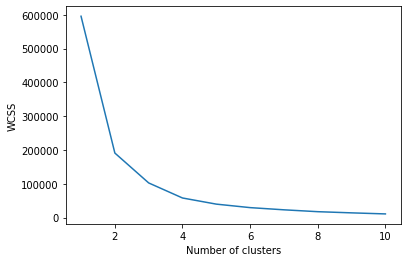

In [338]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [339]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)
df['cluster'] = kmeans.labels_
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,cluster
0,40,1,1,140,289,0,1,172,0,0.0,2,0,1
1,49,0,2,160,180,0,1,156,0,1.0,1,1,2
2,37,1,1,130,283,0,2,98,0,0.0,2,0,3
3,48,0,0,138,214,0,1,108,1,1.5,1,1,0
4,54,1,2,150,195,0,1,122,0,0.0,2,0,0


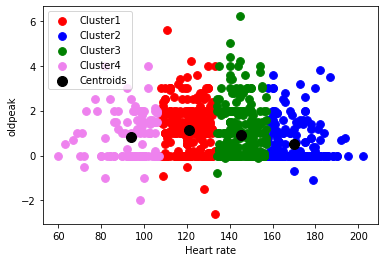

In [340]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'yellow', label = 'Cluster5') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Heart rate') 
plt.ylabel('oldpeak') 
plt.legend() 

plt.show()